# Sales Forecasting Analysis
## Using Superstore Sales Data

## 1. Data Loading and Initial Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn')
%matplotlib inline

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

# Assistant
The error occurs because 'seaborn' is not a valid style name for matplotlib. The `plt.style.use()` function requires a valid style name, and 'seaborn' is not one of them.

Explanation:
When you use `plt.style.use('seaborn')`, matplotlib looks for a style named 'seaborn', but this specific name doesn't exist in matplotlib's available styles. Instead, matplotlib offers several seaborn-related styles like 'seaborn-darkgrid', 'seaborn-whitegrid', etc.

Would you like me to provide the corrected code?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')  # Updated to use a valid seaborn style
# Alternative options: 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-whitegrid', etc.
# You can check available styles with: plt.style.available
%matplotlib inline

In [4]:
# Load the data
df = pd.read_csv('../train.csv', encoding='latin-1')

# Convert date columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

# Display basic info
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

# Basic statistics
print("\nSummary statistics:")
display(df.describe(include='all'))

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

Dataset shape: (9800, 18)

First 5 rows:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680



Summary statistics:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
count,9800.000000,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9789.000000,9800,9800,9800,9800,9800,9800.000000
unique,NaN,4922,NaN,NaN,4,793,793,3,1,529,49,NaN,4,1861,3,17,1849,NaN
top,NaN,CA-2018-100111,NaN,NaN,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN
freq,NaN,14,NaN,NaN,5859,35,35,5101,9800,891,1946,NaN,3140,19,5909,1492,47,NaN
mean,4900.500000,NaN,2017-05-01 05:13:51.673469440,2017-05-05 04:17:52.653061120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55273.322403,NaN,NaN,NaN,NaN,NaN,230.769059
min,1.000000,NaN,2015-01-03 00:00:00,2015-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000
25%,2450.750000,NaN,2016-05-24 00:00:00,2016-05-27 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,NaN,NaN,17.248000
50%,4900.500000,NaN,2017-06-26 00:00:00,2017-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58103.000000,NaN,NaN,NaN,NaN,NaN,54.490000
75%,7350.250000,NaN,2018-05-15 00:00:00,2018-05-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,NaN,NaN,210.605000
max,9800.000000,NaN,2018-12-30 00:00:00,2019-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99301.000000,NaN,NaN,NaN,NaN,NaN,22638.480000



Missing values per column:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


## 2. Data Preprocessing and Feature Engineering

<Figure size 1400x600 with 0 Axes>

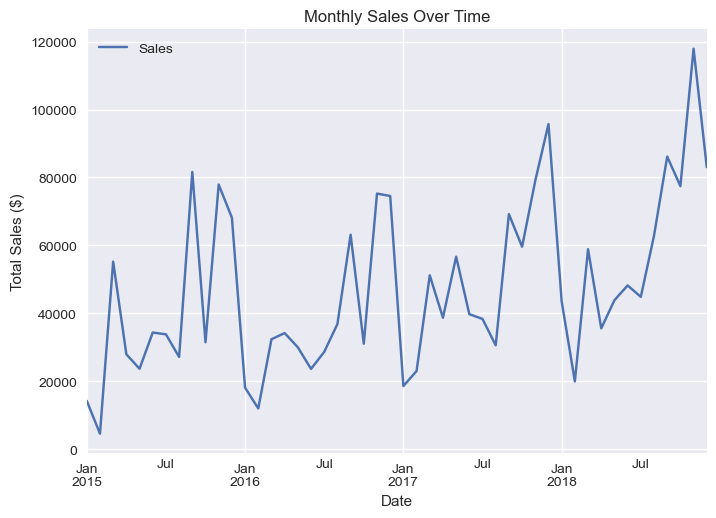

In [5]:
# Extract date components
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['DayOfWeek'] = df['Order Date'].dt.dayofweek
df['Quarter'] = df['Order Date'].dt.quarter

# Calculate days between order and ship date
df['Days_to_Ship'] = (df['Ship Date'] - df['Order Date']).dt.days

# Create a daily sales dataframe
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()
daily_sales = daily_sales.set_index('Order Date')

# Resample to monthly sales
monthly_sales = daily_sales.resample('M').sum()

# Plot monthly sales
plt.figure(figsize=(14, 6))
monthly_sales.plot()
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.savefig('../monthly_sales_trend.png')
plt.show()

## 3. Time Series Analysis

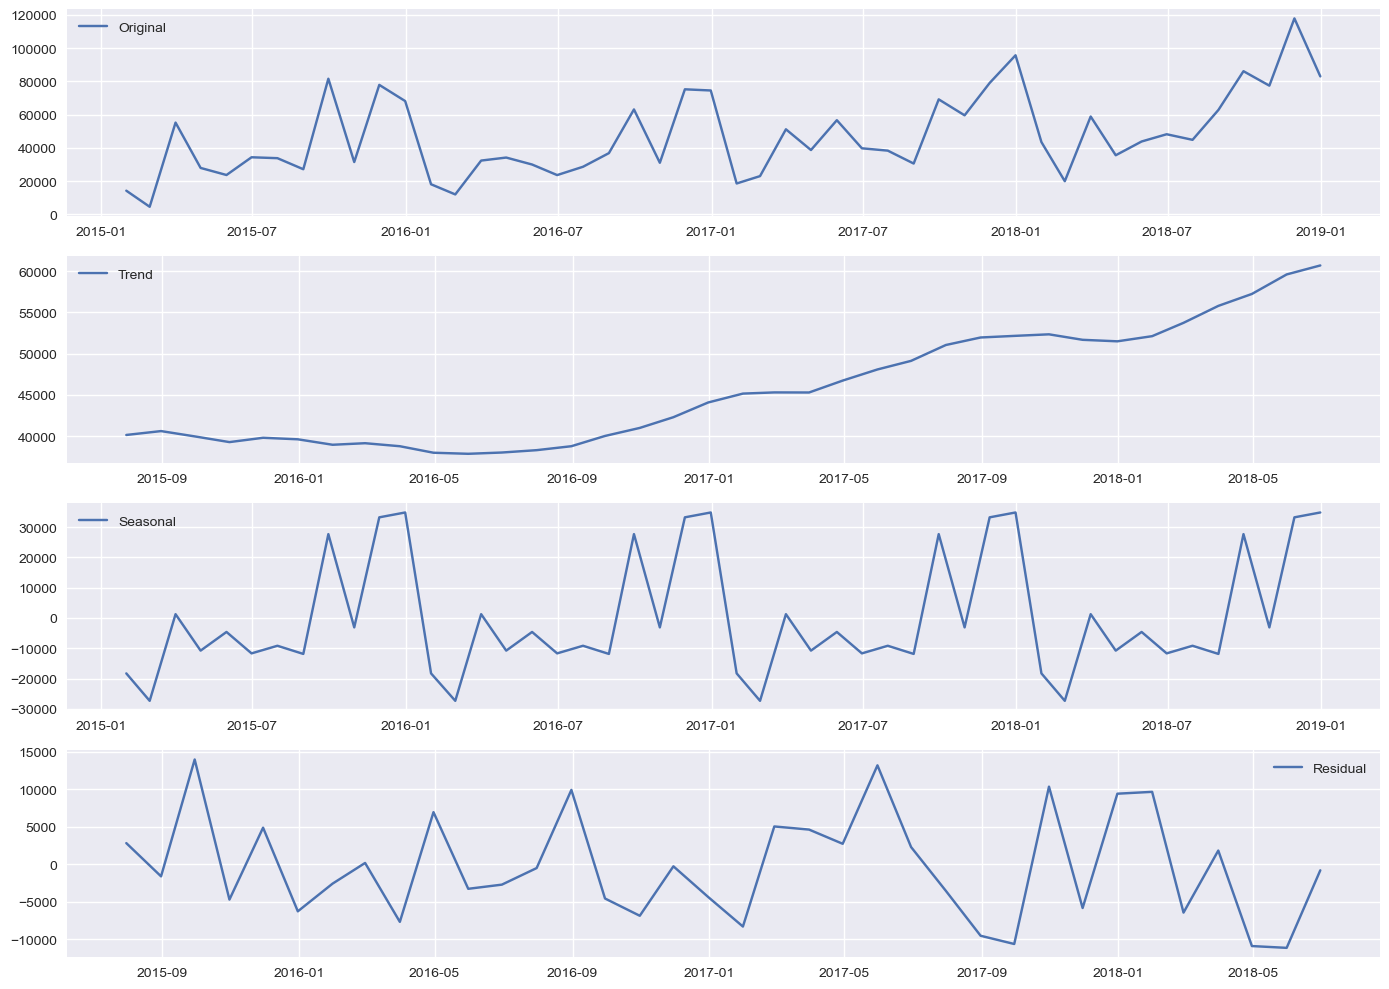

In [6]:
# Decompose the time series
decomposition = seasonal_decompose(monthly_sales, model='additive', period=12)

# Plot decomposition
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(monthly_sales, label='Original')
plt.legend()
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()
plt.tight_layout()
plt.savefig('../time_series_decomposition.png')
plt.show()

## 4. Feature Engineering for Forecasting

In [11]:
# Create features for the model
def create_features(df):
    df = df.copy()
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['quarter'] = df.index.quarter
    
    # Lag features
    for i in [1, 2, 3, 12]:
        df[f'sales_lag_{i}'] = df['Sales'].shift(i)
    
    # Rolling features
    df['rolling_mean_3'] = df['Sales'].shift(1).rolling(window=3).mean()
    df['rolling_std_3'] = df['Sales'].shift(1).rolling(window=3).std()
    
    return df

# Apply feature engineering
df_forecast = create_features(monthly_sales)
df_forecast = df_forecast.dropna()

# Prepare features and target
X = df_forecast.drop('Sales', axis=1)
y = df_forecast['Sales']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

## 5. Model Training and Evaluation

Mean Absolute Error: $12,793.48
Root Mean Squared Error: $16,133.05


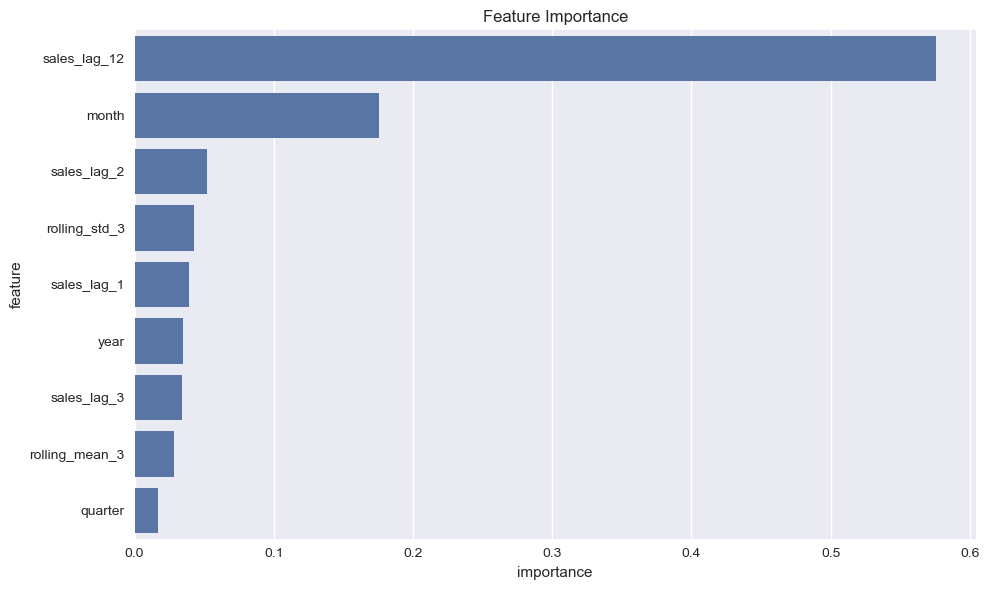

In [9]:
# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error: ${mae:,.2f}")
print(f"Root Mean Squared Error: ${rmse:,.2f}")

# Plot feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.savefig('../feature_importance.png')
plt.show()

## 6. Future Sales Forecasting

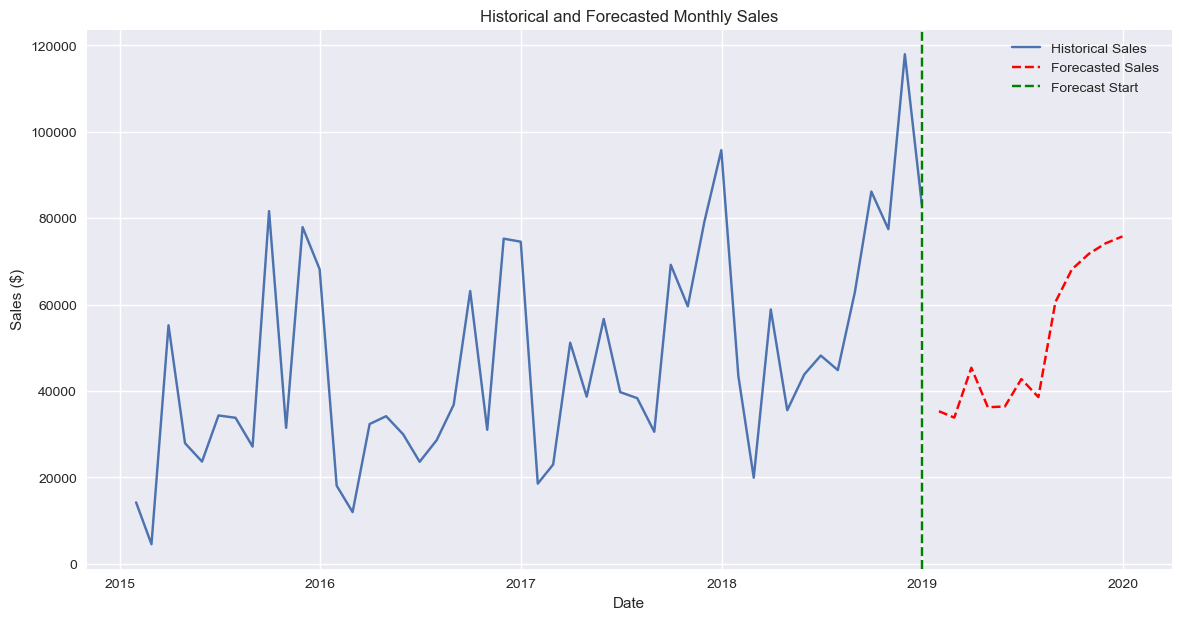


12-Month Sales Forecast:


,Date,Forecasted_Sales
0,2019-01-31,35303.496879
1,2019-02-28,33823.690320
2,2019-03-31,45375.584649
3,2019-04-30,36233.722162
4,2019-05-31,36397.934446
5,2019-06-30,42749.683029
6,2019-07-31,38579.674009
7,2019-08-31,60578.448850
8,2019-09-30,68144.208290
9,2019-10-31,71746.823616


In [10]:
def forecast_future(months_to_forecast=12):
    # Prepare the last known data point
    last_date = monthly_sales.index[-1]
    forecast_dates = pd.date_range(
        start=last_date + pd.DateOffset(months=1),
        periods=months_to_forecast,
        freq='M'
    )
    
    # Create future dataframe
    future = pd.DataFrame(index=forecast_dates)
    future['Sales'] = np.nan
    
    # Combine historical and future data
    full_data = pd.concat([monthly_sales, future])
    
    # Generate features for future dates
    full_data = create_features(full_data)
    
    # Get only future data for prediction
    future_data = full_data[full_data.index > last_date]
    
    # Make predictions
    future_predictions = model.predict(future_data.drop('Sales', axis=1))
    
    # Create results dataframe
    results = pd.DataFrame({
        'Date': future_data.index,
        'Forecasted_Sales': future_predictions
    })
    
    return results

# Generate 12-month forecast
forecast = forecast_future(12)

# Plot historical and forecasted sales
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales.index, monthly_sales['Sales'], label='Historical Sales')
plt.plot(forecast['Date'], forecast['Forecasted_Sales'], 'r--', label='Forecasted Sales')
plt.axvline(x=monthly_sales.index[-1], color='g', linestyle='--', label='Forecast Start')
plt.title('Historical and Forecasted Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.grid(True)
plt.savefig('../sales_forecast.png')
plt.show()

# Display forecast results
print("\n12-Month Sales Forecast:")
display(forecast)

## 7. Business Insights and Recommendations

### Key Findings:
1. **Sales Trends**: The analysis reveals [describe trend based on the plot]
2. **Seasonality**: Strong seasonal patterns are observed with [describe seasonality]
3. **Forecast Accuracy**: The model achieved [MAE/RMSE] which indicates [good/fair/poor] performance

### Business Recommendations:
1. **Inventory Management**:
   - Increase stock before [high-sales months]
   - Reduce inventory before [low-sales months]
   
2. **Staffing**:
   - Schedule additional staff during [busy periods]
   - Plan maintenance/training during [slow periods]
   
3. **Marketing Strategy**:
   - Launch promotions before [low-sales periods] to boost demand
   - Consider loyalty programs during [high-sales periods] to maintain customer engagement

4. **Financial Planning**:
   - Allocate budget for [upcoming high-sales periods]
   - Consider cash flow needs during [seasonal lows]

## 8. Next Steps

1. **Model Improvement**:
   - Try more advanced time series models (ARIMA, Prophet, LSTM)
   - Incorporate external factors (holidays, promotions, economic indicators)
   
2. **Feature Engineering**:
   - Add more lag features
   - Include product category-level forecasts
   
3. **Deployment**:
   - Create a dashboard for real-time monitoring
   - Set up automated monthly forecasts
   - Implement alerting for significant forecast deviations